In [1]:
import os
import numpy as np
import pandas as pd

## Read Data

In [4]:
products = pd.read_csv('products_train.csv')
products.head()

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,NaN,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,NaN,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,NaN,Inhalt: 1 Stück


In [5]:
train = pd.read_csv('sessions_train.csv')
train.head()

,prev_items,next_item,locale
0,['B09W9FND7K' 'B09JSPLN1M'],B09M7GY217,DE
1,['B076THCGSG' 'B007MO8IME' 'B08MF65MLV' 'B001B...,B001B4THSA,DE
2,['B0B1LGXWDS' 'B00AZYORS2' 'B0B1LGXWDS' 'B00AZ...,B0767DTG2Q,DE
3,['B09XMTWDVT' 'B0B4MZZ8MB' 'B0B7HZ2GWX' 'B09XM...,B0B4R9NN4B,DE
4,['B09Y5CSL3T' 'B09Y5DPTXN' 'B09FKD61R8'],B0BGVBKWGZ,DE


In [6]:
test = pd.read_csv('sessions_test_task1.csv')
test.head()

,prev_items,locale
0,['B08V12CT4C' 'B08V1KXBQD' 'B01BVG1XJS' 'B09VC...,DE
1,['B00R9R5ND6' 'B00R9RZ9ZS' 'B00R9RZ9ZS'],DE
2,['B07YSRXJD3' 'B07G7Q5N6G' 'B08C9Q7QVK' 'B07G7...,DE
3,['B08KQBYV43' '3955350843' '3955350843' '39553...,DE
4,['B09FPTCWMC' 'B09FPTQP68' 'B08HMRY8NG' 'B08TB...,DE


## Preprocessing

In [7]:
def preprocessing(products, train, mylocale:str):
    products_subset = products[products['locale'] == mylocale].reset_index(drop=True)
    train_subset = train[train['locale'] == mylocale].reset_index(drop=True)
    products_subset = products_subset.drop(columns = ['locale'])
    train_subset = train_subset.drop(columns = ['locale'])
    # check missing values
    print(products_subset.isna().sum()/len(products_subset))
    print('##################################')
    print(train_subset.isna().sum()/len(train_subset))
    print('##################################')
    # check duplicates
    print("id duplicates: {}".format(products_subset.id.duplicated().sum()))
    print('##################################')
    # fillna ##TODO:
    products_subset = products_subset.fillna('')
    # check text length
    print("max_length of title: {}, desc: {}".format(max([len(i.split()) for i in products_subset.title]), max([len(i.split()) for i in products_subset.desc])))
    print('##################################')
    import re
    prev_items_list = list(train_subset.prev_items)
    prev_items_list_new = [re.sub('[^0-9A-Z ]+', '', items).split() for items in prev_items_list]
    train_subset['prev_items'] = prev_items_list_new
    prev_items_list_new_len = [len(prev_items) for prev_items in prev_items_list_new]
    print("max, min, avg, median of prev_items: {}, {}, {}, {}".format(max(prev_items_list_new_len), min(prev_items_list_new_len), np.mean(prev_items_list_new_len), np.median(prev_items_list_new_len)))
    return products_subset, train_subset

In [8]:
products.locale.unique()

array(['DE', 'JP', 'UK', 'ES', 'FR', 'IT'], dtype=object)

In [9]:
products_de, train_de = preprocessing(products, train, mylocale='DE')

id          0.000000
title       0.000000
price       0.000000
brand       0.018143
color       0.244751
size        0.423134
model       0.509640
material    0.428679
author      0.951936
desc        0.074713
dtype: float64
##################################
prev_items    0.0
next_item     0.0
dtype: float64
##################################
id duplicates: 0
##################################
max_length of title: 81, desc: 172
##################################
max, min, avg, median of prev_items: 156, 2, 4.35209048637054, 3.0


In [10]:
products_jp, train_jp = preprocessing(products, train, mylocale='JP')

id          0.000000
title       0.000020
price       0.000000
brand       0.013769
color       0.359675
size        0.408431
model       0.562810
material    0.554311
author      0.936895
desc        0.106739
dtype: float64
##################################
prev_items    0.0
next_item     0.0
dtype: float64
##################################
id duplicates: 0
##################################
max_length of title: 106, desc: 223
##################################
max, min, avg, median of prev_items: 474, 2, 4.48238671703848, 3.0


In [11]:
products_uk, train_uk = preprocessing(products, train, mylocale='UK')

id          0.000000
title       0.000000
price       0.000000
brand       0.008557
color       0.244112
size        0.398033
model       0.513117
material    0.402305
author      0.962222
desc        0.078488
dtype: float64
##################################
prev_items    0.0
next_item     0.0
dtype: float64
##################################
id duplicates: 0
##################################
max_length of title: 107, desc: 195
##################################
max, min, avg, median of prev_items: 201, 2, 4.121624353631128, 3.0


In [12]:
products_uk.head()

,id,title,price,brand,color,size,model,material,author,desc
0,B087LZNPHS,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",24.99,SOCHOW,Teal Green,127cm×150cm,,100% Polyester,,COLOR: The sherpa throw blanket is available i...
1,B08THFN1KX,Hippowarehouse Personalised Photo Printed Mous...,9.95,Hippowarehouse,White,240mm x 190mm x 60mm,50245-Mat-Perso,Rubber,,Competitively priced
2,0804185328,"500 Easy Recipes for Every Machine, Both Stove...",16.49,Clarkson Potter,White,,,,"Scarbrough, Mark",
3,B09VBKDBW6,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",11.99,TYHJOY,Black,,FBA-sealer-black,Acrylonitrile Butadiene Styrene,,【AFTER-SALE】This handheld food heat sealer sho...
4,B096ZW8B49,Lucosobie Steering Wheel Lock - Car Anti-Theft...,26.99,Lucosobie,Black,,,Alloy Steel,,🔐【 Anti-Friction & Customer First】Each box of ...


In [13]:
products_uk.title[0]

'SOCHOW Sherpa Fleece Throw Blanket, Double-Sided Super Soft Luxurious Plush Blanket 127cm×150cm, Teal Green'

In [14]:
def combine_features(products_subset):
    new = []
    for i in range(len(products_subset)):
        a = ''
        if products_subset['title'][i]!='':
            if products_subset['brand'][i] in products_subset['title'][i]:
                a = products_subset['title'][i]
            else:
                a = products_subset['brand'][i] + ' ' + products_subset['title'][i]

            if products_subset['color'][i] in a:
                pass
            else:
                a = a + ' ' + products_subset['color'][i]
            
            if products_subset['size'][i] in a:
                pass
            else:
                a = a + ' ' + products_subset['size'][i]
                
            if products_subset['model'][i] in a:
                pass
            else:
                a = a + ' ' + products_subset['model'][i]
        new.append(a)
    products_subset['new_feature'] = new
    products_subset = products_subset[['id', 'price', 'new_feature', 'desc']]
    return products_subset

In [15]:
products_subset = combine_features(products_uk)

In [16]:
products_subset['new_feature_len'] = [len(i.split()) for i in products_subset.new_feature]
products_subset['desc_len'] = [len(i.split()) for i in products_subset.desc]

/tmp/ipykernel_6166/462355804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_subset['new_feature_len'] = [len(i.split()) for i in products_subset.new_feature]
/tmp/ipykernel_6166/462355804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_subset['desc_len'] = [len(i.split()) for i in products_subset.desc]


## EDA - check text length

<AxesSubplot:>

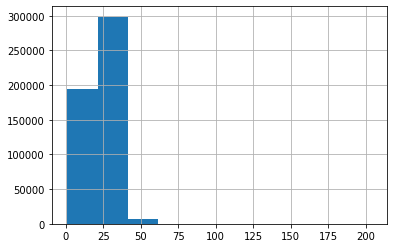

In [17]:
products_subset['new_feature_len'].hist()

In [18]:
np.percentile(products_subset['new_feature_len'], 95)

37.0

<AxesSubplot:>

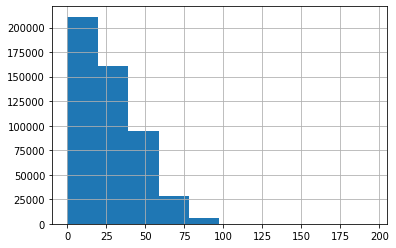

In [19]:
products_subset['desc_len'].hist()

In [20]:
np.percentile(products_subset['desc_len'], 95)

63.0

In [21]:
# for idx in range(len(products_subset)):
#     if products_subset['desc'][idx]=='':
#         print(idx)

In [22]:
# products_subset.isna().sum()

## Get Embeddings

In [23]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 85 kB 5.2 MB/s eta 0:00:011
     |████████████████████████████████| 7.0 MB 20.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 137.9 MB/s eta 0:00:01
     |████████████████████████████████| 200 kB 152.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 115.4 MB/s eta 0:00:01
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=3c24f4520bd02039f8625d4f3ad7d4f7dab37c48b1c9873e00aecea945618d8c
  Stored in directory: /tmp/pip-ephem-wheel-cache-bx7dzm08/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [25]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("sentence-transformers/distiluse-base-multilingual-cased-v2")

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
new_features = list(products_subset.new_feature)
new_features_embeddings = model.encode(new_features, show_progress_bar = True)

Batches: 100%|███████████████████████████| 15631/15631 [02:19<00:00, 112.25it/s]


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_features_embeddings_ss = scaler.fit_transform(new_features_embeddings)

## Dimension Reduction

### PCA

211


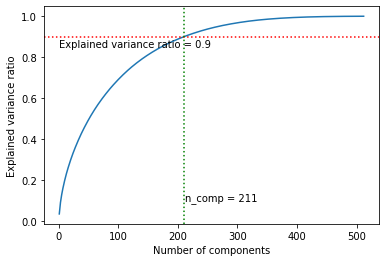

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pca = PCA()

pca.fit(new_features_embeddings_ss)

# Plot explained variance ratio
threshold = 0.9
cumsum = np.cumsum(pca.explained_variance_ratio_)
idx = np.where(cumsum >= threshold)[0][0]
print(idx+1)
plt.plot([i for i in range(1, len(cumsum)+1)], cumsum)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.axhline(y=threshold, color='r', linestyle=':')
plt.axvline(x=idx+1, color='green', linestyle=':')\
# , label = 'axhline - % of Explained variance ratio = 0.9'
# , label = 'axvline - % of Number of components = {}'.format(idx+1)
# plt.legend(loc = 'best')
plt.annotate('n_comp = {}'.format(idx+1), (idx+1+1, 0.1))
plt.annotate('Explained variance ratio = {}'.format(threshold), (0, threshold-0.05))
plt.show()

### UMAP

In [29]:
! pip install umap-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 88 kB 5.4 MB/s eta 0:00:011
     |████████████████████████████████| 1.1 MB 8.1 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=953631c496d9694dddf112cff90ba4852520996be2d612ff8fb53952ec3193a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-uxogt1x_/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.9-py3-none-any.whl size=55621 sha256=b8a1579133477fa6d00f7c2fddff9ef7fa6cd1439c8196069a8e6b25680f119f
  Stored in directory: 

2023-04-19 23:15:57.458515: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [58]:
import umap.umap_ as umap
import time
start=time.time()
# Initialize UMAP transformer
umap_transformer = umap.UMAP(n_components=2, random_state=42)
chunk_size=10000
num_chunks = int(np.ceil(len(new_features_embeddings_ss)/chunk_size))
new_features_embeddings_ss_umap = np.empty((0, 2))
for par in range(num_chunks):
# Fit and transform the data using UMAP
    new_features_embeddings_ss_umap_tmp = umap_transformer.fit_transform(new_features_embeddings_ss[par*chunk_size:(par+1)*chunk_size])
    new_features_embeddings_ss_umap = np.concatenate((new_features_embeddings_ss_umap, new_features_embeddings_ss_umap_tmp), axis=0)
    print("{} seconds".format(time.time()-start))

27.569215774536133 seconds
41.2110869884491 seconds
54.508546352386475 seconds
68.34059715270996 seconds
80.83519649505615 seconds
93.3623456954956 seconds
106.39249157905579 seconds
118.80496144294739 seconds
136.32608723640442 seconds
149.80932140350342 seconds
162.22606134414673 seconds
174.6557137966156 seconds
187.09232783317566 seconds
201.0050711631775 seconds
214.90126729011536 seconds
228.39502143859863 seconds
241.17144918441772 seconds
254.98734974861145 seconds
267.8090150356293 seconds
280.8791732788086 seconds
293.79599833488464 seconds
306.3641152381897 seconds
319.67109727859497 seconds
332.4134430885315 seconds
344.7978880405426 seconds
357.4580829143524 seconds
369.9459319114685 seconds
382.4183692932129 seconds
394.79665446281433 seconds
414.6799547672272 seconds
427.1904604434967 seconds
439.4996461868286 seconds
452.00811862945557 seconds
464.67766284942627 seconds
477.93714570999146 seconds
491.4379119873047 seconds
504.2363955974579 seconds
517.58664727211 second

In [59]:
new_features_embeddings_ss_umap.shape

(500180, 2)

In [60]:
len(new_features_embeddings_ss)

500180

In [65]:
new_features_embeddings_ss_umap[0]

array([-2.04860234,  2.60448003])

In [66]:
df = pd.DataFrame(new_features_embeddings_ss_umap, 
                  columns = ['new_ss_dim{}'.format(i) for i in range(1, new_features_embeddings_ss_umap.shape[1]+1)], 
                  index = products_subset.id)
df.head()

,new_ss_dim1,new_ss_dim2
id,,
B087LZNPHS,-2.048602,2.604480
B08THFN1KX,-0.794100,6.577976
0804185328,0.871445,4.858835
B09VBKDBW6,-1.933894,4.358277
B096ZW8B49,-1.831564,4.640367


In [67]:
df.to_csv('new_feature_embedding_ss.csv')

In [68]:
df1 = products_subset[products_subset['desc'] != '']
df2 = products_subset[products_subset['desc'] == '']

In [69]:
descs = list(df1.desc)
descs_embeddings = model.encode(descs, show_progress_bar = True)
descs_embeddings_ss = scaler.fit_transform(descs_embeddings)

Batches: 100%|███████████████████████████| 14404/14404 [02:18<00:00, 103.86it/s]


In [72]:
df11 = pd.DataFrame(descs_embeddings_ss, 
                    columns = ['desc_ss_dim{}'.format(i) for i in range(1, descs_embeddings_ss.shape[1]+1)], 
                    index = df1.id)
df22 = pd.DataFrame(columns = ['desc_ss_dim{}'.format(i) for i in range(1, descs_embeddings_ss.shape[1]+1)], 
                    index = df2.id)
df = pd.concat([df11, df22])
df = df.fillna(value = dict(zip(['desc_ss_dim{}'.format(i) for i in range(1, descs_embeddings_ss.shape[1]+1)], 
         descs_embeddings_ss.mean(axis=0).tolist())))
# df = df.set_index('id', drop=True)

# df.to_csv('desc_embedding_ss.csv')

In [73]:
df.head()

,desc_ss_dim1,desc_ss_dim2,desc_ss_dim3,desc_ss_dim4,desc_ss_dim5,desc_ss_dim6,desc_ss_dim7,desc_ss_dim8,desc_ss_dim9,desc_ss_dim10,...,desc_ss_dim503,desc_ss_dim504,desc_ss_dim505,desc_ss_dim506,desc_ss_dim507,desc_ss_dim508,desc_ss_dim509,desc_ss_dim510,desc_ss_dim511,desc_ss_dim512
id,,,,,,,,,,,,,,,,,,,,,
B087LZNPHS,2.402671,-0.619928,1.191260,-1.545116,1.969584,-1.589950,0.558828,2.130884,-0.252730,0.024742,...,-1.893020,-0.714152,-1.833597,0.219110,-0.402913,0.889393,-0.255981,-0.437561,-0.310682,0.110572
B08THFN1KX,0.667211,0.749581,-1.676529,1.316755,0.877130,0.304325,1.530743,-1.105549,-0.842364,1.160703,...,-0.074898,0.283160,0.412137,1.344810,-1.392480,-1.439571,-0.557038,-1.272577,-0.953102,0.682842
B09VBKDBW6,-0.742202,-0.638620,-0.988613,-0.672901,-0.120031,0.450943,0.221856,0.430954,-1.891826,0.866082,...,-0.300580,-0.851687,-0.185390,-1.569515,0.773210,2.095119,0.139469,-0.899439,-0.015912,1.457756
B096ZW8B49,1.102321,1.816693,-0.984538,0.539997,-0.260721,-0.294670,-0.549745,0.399232,-1.339510,0.560751,...,0.579798,-1.131419,-0.876315,-3.036862,-0.508603,1.738768,-0.726064,0.176187,0.864866,-1.520686
B0BKQY1FKM,-1.240328,1.567278,-0.763112,-0.452179,-2.671974,1.317655,1.478395,-2.327338,-0.915801,-1.120296,...,1.538442,1.397978,0.198845,0.058565,-0.285265,-2.833588,-1.941330,-0.780513,1.604548,-0.133199


In [74]:
desc_embeddings_ss = np.column_stack([df[i].values for i in df.columns])

In [77]:
start=time.time()
# Initialize UMAP transformer
umap_transformer = umap.UMAP(n_components=2, random_state=42)
chunk_size=10000
num_chunks = int(np.ceil(len(desc_embeddings_ss)/chunk_size))
desc_embeddings_ss_umap = np.empty((0, 2))
for par in range(num_chunks):
# Fit and transform the data using UMAP
    desc_embeddings_ss_umap_tmp = umap_transformer.fit_transform(desc_embeddings_ss[par*chunk_size:(par+1)*chunk_size])
    desc_embeddings_ss_umap = np.concatenate((desc_embeddings_ss_umap,desc_embeddings_ss_umap_tmp), axis=0)
    print("par {}, {} seconds".format((par+1), time.time()-start))

par 1, 12.72112774848938 seconds
par 2, 25.45734930038452 seconds
par 3, 38.36075186729431 seconds
par 4, 51.365543842315674 seconds
par 5, 65.23381328582764 seconds
par 6, 79.11798644065857 seconds
par 7, 92.07519555091858 seconds
par 8, 108.13709783554077 seconds
par 9, 121.13784098625183 seconds
par 10, 133.84897112846375 seconds
par 11, 146.61209750175476 seconds
par 12, 159.29742074012756 seconds
par 13, 172.44686102867126 seconds
par 14, 185.23835825920105 seconds
par 15, 198.84918665885925 seconds
par 16, 211.90715074539185 seconds
par 17, 224.83533430099487 seconds
par 18, 237.51941061019897 seconds
par 19, 250.2424247264862 seconds
par 20, 262.91178464889526 seconds
par 21, 275.5009882450104 seconds
par 22, 288.10945320129395 seconds
par 23, 300.6105697154999 seconds
par 24, 313.1292405128479 seconds
par 25, 325.61873745918274 seconds
par 26, 338.5439329147339 seconds
par 27, 351.3034973144531 seconds
par 28, 363.86257219314575 seconds
par 29, 376.39770317077637 seconds
par 30

In [78]:
desc_embeddings_ss_umap.shape

(500180, 2)

In [80]:
df = pd.DataFrame(desc_embeddings_ss_umap, 
                  columns = ['desc_ss_dim{}'.format(i) for i in range(1, desc_embeddings_ss_umap.shape[1]+1)], 
                  index = products_subset.id)
df.head()

,desc_ss_dim1,desc_ss_dim2
id,,
B087LZNPHS,8.639402,-1.830336
B08THFN1KX,5.649401,-1.117106
0804185328,8.191178,0.121946
B09VBKDBW6,8.170777,5.182589
B096ZW8B49,5.684450,-1.017073


In [81]:
df.to_csv('desc_embedding_ss.csv')

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
prices_ss = scaler.fit_transform(products_subset.price.values.reshape(-1, 1))

In [89]:
df = pd.DataFrame()
df.index = products_subset.id
df['price_ss'] = prices_ss
df_new_ss = pd.read_csv('new_feature_embedding_ss.csv', index_col='id')
df_desc_ss = pd.read_csv('desc_embedding_ss.csv', index_col='id')
df = df.merge(df_new_ss, how='left', left_index=True, right_index=True)
df = df.merge(df_desc_ss, how='left', left_index=True, right_index=True)
df.head()

,price_ss,new_ss_dim1,new_ss_dim2,desc_ss_dim1,desc_ss_dim2
id,,,,,
B087LZNPHS,-0.230721,-2.048602,2.604480,8.639402,-1.830336
B08THFN1KX,-0.230723,-0.794100,6.577976,5.649401,-1.117106
0804185328,-0.230722,0.871445,4.858835,8.191178,0.121946
B09VBKDBW6,-0.230722,-1.933894,4.358277,8.170777,5.182589
B096ZW8B49,-0.230721,-1.831564,4.640367,5.684450,-1.017073


In [90]:
df.to_csv('products_final3.csv')

In [ ]:
train_subset = train_uk

In [99]:
train_subset['prev_item1'] = [i[-1] if len(i)>0 else '' for i in train_subset.prev_items]
train_subset['prev_item2'] = [i[-2] if len(i)>1 else '' for i in train_subset.prev_items]
train_subset['prev_item3'] = [i[-3] if len(i)>2 else '' for i in train_subset.prev_items]

In [100]:
train_subset.head()

,prev_items,next_item,prev_item1,prev_item2,prev_item3
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,B07Y21LDJX,B07J4WF8VH,B0BFDR9X13
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6,B07GZW3P4W,B07FM2GLNQ,
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,B07DDL77RY,B07DDL77RY,B0021L95HU
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO,B000I8XZ7O,B0B2WSZYL2,
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,B09HLDN8W1,B00OI6NQUI,B00LW1APOC


## RNN

In [ ]:
df = pd.read_csv('products_final3.csv', index_col='id')

In [108]:
combined = np.column_stack([df[i].values for i in df.columns])

In [109]:
dq = pd.DataFrame()
dq['id'] = df.index
dq['combined'] = list(combined)
dq.head()

,id,combined
0,B087LZNPHS,"[-0.23072097654590898, -2.048602342605591, 2.6..."
1,B08THFN1KX,"[-0.23072269297078246, -0.7941001653671265, 6...."
2,0804185328,"[-0.2307219465998601, 0.87144535779953, 4.8588..."
3,B09VBKDBW6,"[-0.2307224601578342, -1.933894157409668, 4.35..."
4,B096ZW8B49,"[-0.2307207482979205, -1.8315637111663816, 4.6..."


In [113]:
train_final = train_subset.drop(columns = ['prev_items'])
for col in train_final.columns:
    train_final = train_final.merge(dq, left_on = col, right_on = 'id', how = 'left')
    train_final = train_final.drop(columns = ['id'])
    train_final = train_final.rename(columns={'combined':col+'_feature'})

In [114]:
train_final.head()

,next_item,prev_item1,prev_item2,prev_item3,next_item_feature,prev_item1_feature,prev_item2_feature,prev_item3_feature
0,B07Y227WNJ,B07Y21LDJX,B07J4WF8VH,B0BFDR9X13,"[-0.23072131891789174, -0.6919684410095215, 4....","[-0.23072131891789174, 0.4343212842941284, -0....","[-0.23072188953786296, 2.3224284648895264, 2.4...","[-0.23072211778585147, 2.9613025188446045, 0.7..."
1,B095NNZCR6,B07GZW3P4W,B07FM2GLNQ,,"[-0.23072234603383995, -2.138838768005371, 1.3...","[-0.23071829349080422, 1.782806396484375, 7.63...","[-0.23072097654590898, 5.550604343414307, 0.79...",NaN
2,B002KA1FZC,B07DDL77RY,B07DDL77RY,B0021L95HU,"[-0.23072297371580833, -1.2492862939834597, 7....","[-0.23072284019073505, -1.854146122932434, 1.7...","[-0.23072284019073505, -1.854146122932434, 1.7...","[-0.2307230672974836, -0.6392215490341187, -0...."
3,B000I90TAO,B000I8XZ7O,B0B2WSZYL2,,"[-0.23072314490179968, 10.140295028686523, 12....","[-0.23072288127537297, -1.7192338705062866, -0...","[-0.2307226884058227, 2.4033868312835693, 6.09...",NaN
4,B07H54NZ3K,B09HLDN8W1,B00OI6NQUI,B00LW1APOC,"[-0.2307208635631547, -0.1349124759435653, 2.9...","[-0.23072308783980255, 1.708019495010376, 5.84...","[-0.23072292806621064, 2.9211792945861816, 0.0...","[-0.23072297257456836, 6.550415515899658, 6.19..."


In [115]:
train_final.isna().sum()/len(train_final)

next_item             0.000000
prev_item1            0.000000
prev_item2            0.000000
prev_item3            0.000000
next_item_feature     0.000000
prev_item1_feature    0.000000
prev_item2_feature    0.000000
prev_item3_feature    0.380077
dtype: float64

In [117]:
prev_item1_feature_ar = np.array([train_final['prev_item1_feature'][i] for i in range(len(train_final))])
prev_item2_feature_ar = np.array([train_final['prev_item2_feature'][i] for i in range(len(train_final))])
next_item_feature_ar = np.array([train_final['next_item_feature'][i] for i in range(len(train_final))])
new_feature_ar = np.concatenate((prev_item1_feature_ar, prev_item2_feature_ar), axis=1).reshape(len(train_final), 2, train_final['prev_item1_feature'][0].shape[0])

In [151]:
new_feature_ar.shape

(1182181, 2, 5)

In [160]:
new_feature_ar_c = new_feature_ar[:5000]
next_item_feature_ar_c = next_item_feature_ar[:5000]

In [161]:
import torch
random_seed = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_feature_ar_c, next_item_feature_ar_c, test_size=0.3, random_state=random_seed)
X_train_t = torch.tensor(X_train, dtype=torch.float)
X_test_t = torch.tensor(X_test, dtype=torch.float)
y_train_t = torch.tensor(y_train, dtype=torch.float)
y_test_t = torch.tensor(y_test, dtype=torch.float)
X_train_t.shape

torch.Size([3500, 2, 5])

In [167]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm.auto import tqdm

# Define the hyperparameters
input_size = 5
hidden_size = 8
output_size = 5
learning_rate = 1e-4
num_epochs = 10
batch_size = 2



# Define the RNN architecture
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Create the data loaders
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_t, y_test_t)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the loss function and optimizer
# Train the model
model = RNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
losses = []
import time
s=time.time()
for epoch in range(100):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
#         print(inputs.shape, outputs.shape, labels.shape )
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    if (epoch+1)%10==0:
        # Print the loss after each epoch
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
        print(time.time() - s)

Epoch 10, Loss: 7.6498
12.633379220962524
Epoch 20, Loss: 14.0707
25.258644342422485
Epoch 30, Loss: 3.5515
37.86321949958801
Epoch 40, Loss: 6.7825
50.46327185630798
Epoch 50, Loss: 19.8518
63.04648423194885
Epoch 60, Loss: 6.8106
75.63802170753479
Epoch 70, Loss: 5.9047
88.23219537734985
Epoch 80, Loss: 11.8820
100.82021951675415
Epoch 90, Loss: 6.9925
113.45803904533386
Epoch 100, Loss: 5.5797
126.05669808387756


In [165]:
import matplotlib.pyplot as plt

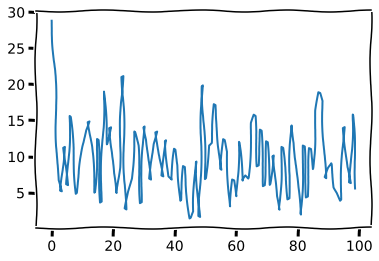

In [168]:
with plt.xkcd():
    plt.plot(losses)

## Calculate Cosine Similarity

In [ ]:
# def cosine_similarity(A, B):
#     '''
#     Input:
#         A: a numpy array which corresponds to a word vector
#         B: A numpy array which corresponds to a word vector
#     Output:
#         cos: numerical number representing the cosine similarity between A and B.
#     '''

#     dot = np.dot(A,B)
#     norma = np.sqrt(np.dot(A,A))
#     normb = np.sqrt(np.dot(B,B))
#     cos = dot/(norma*normb)

#     return cos

In [ ]:
# cs = []
# idx=[]
# for i in range(len(df)):
#     cs_tmp = cosine_similarity(combined[i], pred)
#     cs.append(cs_tmp)
#     idx.append(i)  